<font size=7> Latencies Analysis

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, read_phy_files,\
                                  plot_latency_dist_hist, plot_latency_angle_hist
from human_hip.animate import animate_latencies
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [4]:
import numpy as np
from human_hip.spike_data import latencies, cross_sttc

In [14]:
def curate_latencies(sd, cross_sttc_min_cutoff=2, cross_sttc_max_cutoff=30, sttc_cutoff = 0.04, latency_cutoff=2.5, sttc_delta=20 ):

    # Get all latencies whose STTC is above some minimum STTC cuttoff
    pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
    for i in range(sd.N):
        for j in range(i+1,sd.N):
            pair_latencies = latencies( i, j, sd, ms_cutoff_high=20) 
            if len(pair_latencies)>40 and stats.ttest_1samp(pair_latencies,0)[1]<.05 :
                if np.mean(pair_latencies) < 0:
                    pairs.append( [ j, i] )   #lags_late.append( latency )
                else:
                    pairs.append( [i, j] ) 
    return np.array(pairs)



In [15]:
#good_pairs = curate_latencies(sd)
good_pairs = curate_latencies(sd)
# with open( 'hc328_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
# load pickled data
# with open( 'hc328_good_pairs.pkl' , 'rb') as my_file:
#     good_pairs = pickle.load(my_file)

In [16]:
#good_pairs
len(good_pairs)

213

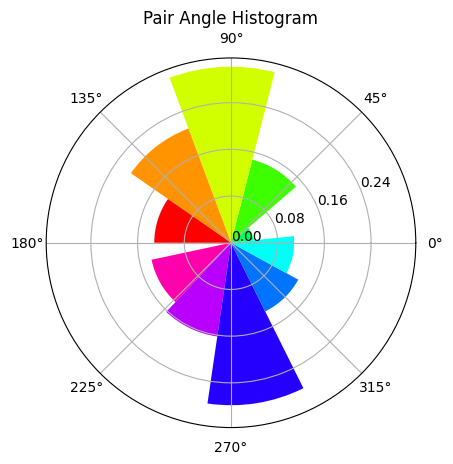

In [17]:
plot_latency_angle_hist(sd, good_pairs)

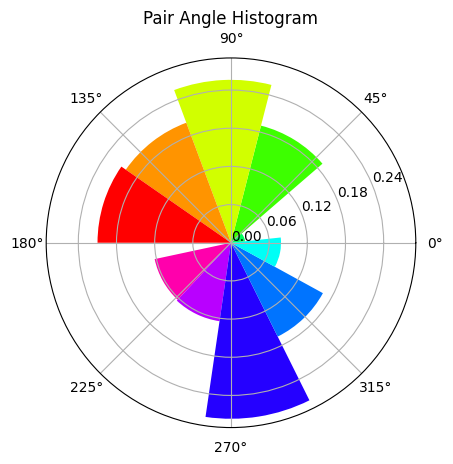

In [18]:
plot_latency_angle_hist(sd, good_pairs, by_firing_rate=True)

# Vector plots

In [32]:
plot_vector_layout

<function human_hip.spike_data.plot_latencies.plot_vector_layout(sd, pairs, normalize=True, plot_neuron=True, arrow_length=75, min_dist=0, image_path=None, xlim=None, ylim=None, background_color='white')>

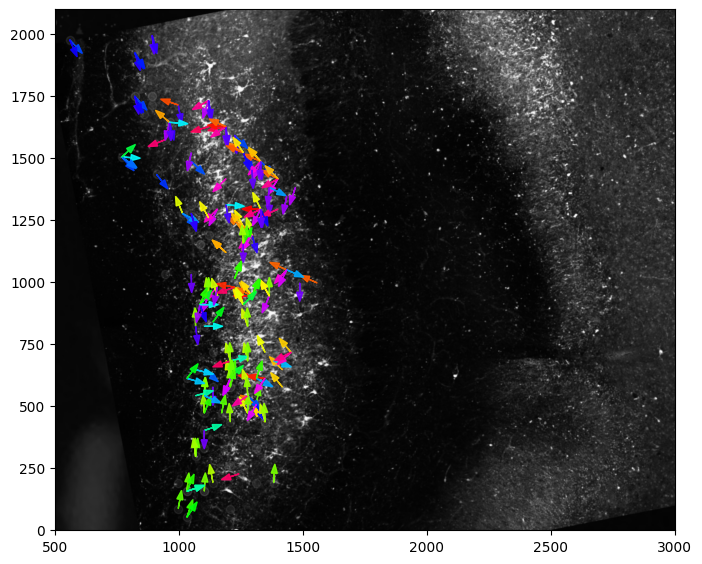

In [19]:
plot_vector_layout( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc328_bw.jpeg", xlim=(500,3000) )

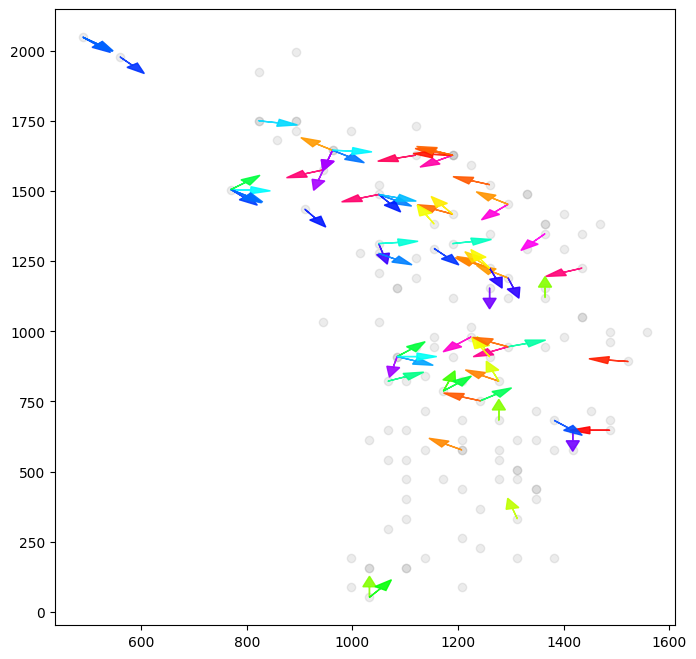

In [34]:
plot_vector_layout( sd, good_pairs)

In [35]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=30):
    @interact
    def plot_pair(pair_i = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair_i,0], pairs[pair_i,1], sd, ms_cutoff_high=ms_cutoff_high )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)
        print("Latency Mean:\t", np.mean(latencies_pair ) )

        t_stat, p_value = stats.ttest_1samp( latencies_pair, 0)
        one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
        print("T-Test 1-Side:\t", one_sided_p_value )  #print("T-Test: ", stats.ttest_1samp(latencies_pair, 0)[1] )

In [36]:
pairs_hisogram( good_pairs, sd, ms_cutoff_high=30)

interactive(children=(IntSlider(value=38, description='pair_i', max=76), Output()), _dom_classes=('widget-inte…